In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet50_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Reprocess
data_transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).to(device)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.193, ECE: 0.021
Optimal temperature: 0.990
After temperature - NLL: 1.192, ECE: 0.024


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9690 ± 0.0012
Final Average Prediction Set Size: 30.74 ± 0.94
Final Average Coverage: 0.9490 ± 0.0020
Final Average Real Probability: 0.8780 ± 0.0035


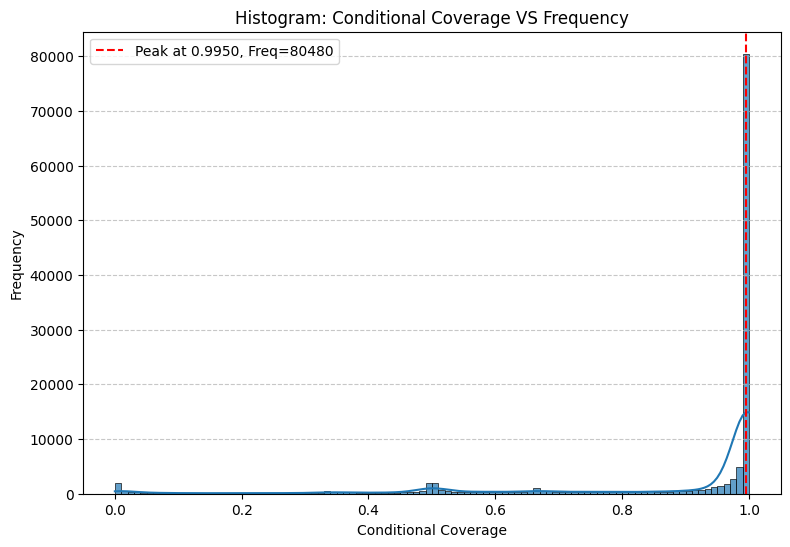

80480 (64.71%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1803 ± 0.0120
Final Average Prediction Set Size: 10.02 ± 0.25
Final Average Coverage: 0.9503 ± 0.0014
Final Average Real Probability: 0.8765 ± 0.0029


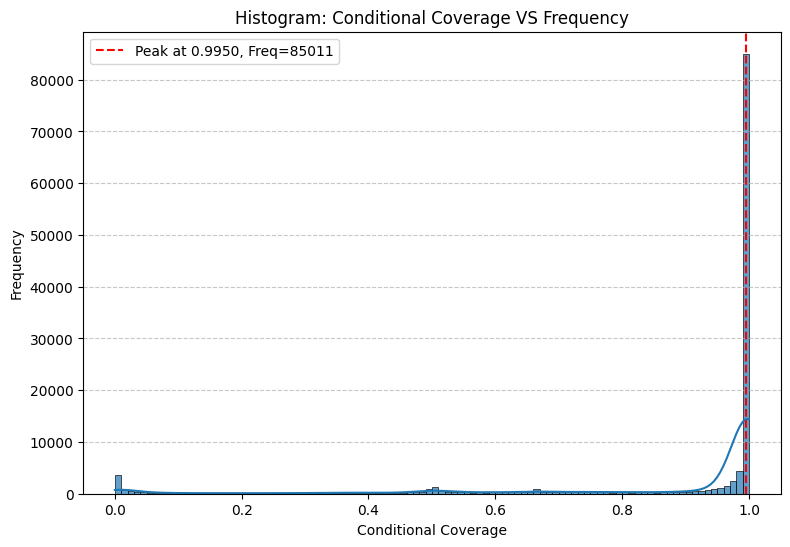

85011 (68.36%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=6, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1020 ± 0.0078
Final Average Prediction Set Size: 7.88 ± 0.16
Final Average Coverage: 0.9499 ± 0.0013
Final Average Real Probability: 0.8730 ± 0.0020


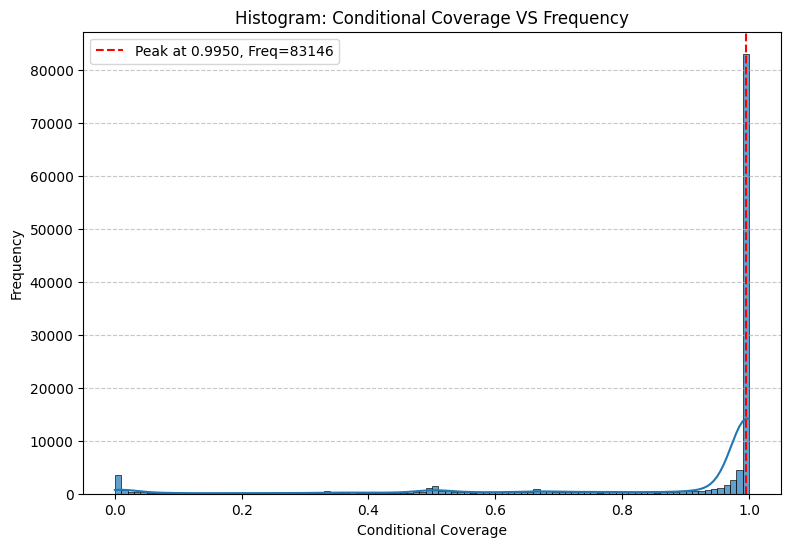

83146 (66.86%) samples reached the peak conditional coverage at 0.9950


In [2]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9682 ± 0.0012
Final Average Prediction Set Size: 31.36 ± 0.86
Final Average Coverage: 0.9487 ± 0.0021
Final Average Real Probability: 0.8770 ± 0.0031


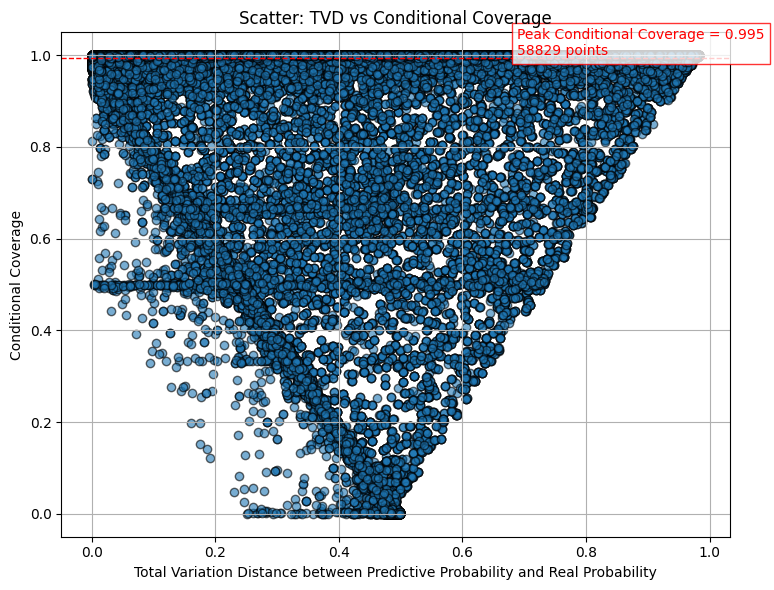

Peak Conditional Coverage = 0.995, with 58829 samples

=== Count Regions Summary ===
42815 (34.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35844 (28.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
21059 (16.9%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.98827']
  Real Probability Set      : ['0.99973']
Sample 2:
  Predictive Probability Set: ['0.96463']
  Real Probability Set      : ['0.83699']
Sample 3:
  Predictive Probability Set: ['0.95883']
  Real Probability Set      : ['0.99187']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.94483']
  Real Probability Set      : ['0.06730']
Sample 2:
  Predictive Probability Set: ['0.48374', '0.35760', '0.13282']
  Real Probability Set      : ['0.00034', '0.06312', '0.00034']
Sample 3:
  Predictive Probability Set: ['0.60292', '0.37877']
  Real Probability Set      

In [3]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1919 ± 0.0107
Final Average Prediction Set Size: 10.18 ± 0.24
Final Average Coverage: 0.9504 ± 0.0012
Final Average Real Probability: 0.8770 ± 0.0026


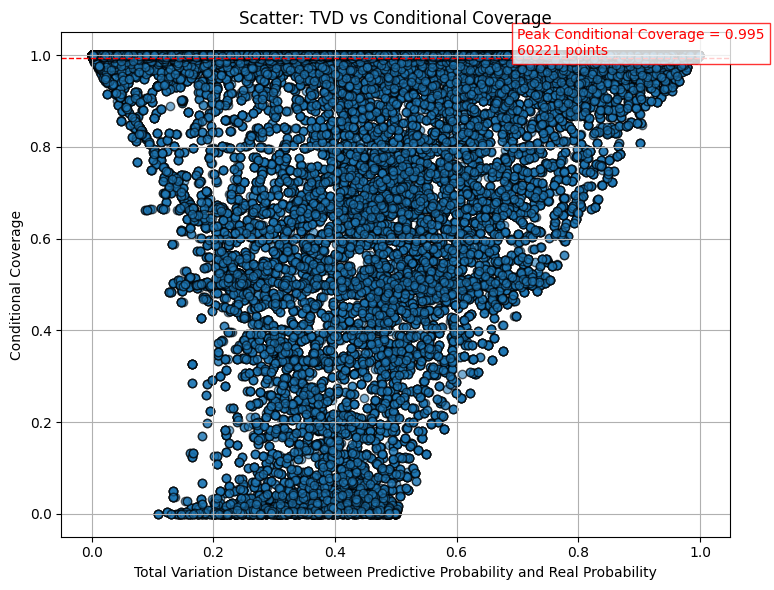

Peak Conditional Coverage = 0.995, with 60221 samples

=== Count Regions Summary ===
42731 (34.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35231 (28.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
17154 (13.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.99768', '0.00152', '0.00024', '0.00019', '0.00009', '0.00005', '0.00004', '0.00003', '0.00003']
  Real Probability Set      : ['0.99241', '0.00648', '0.00037', '0.00000', '0.00037', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.44153', '0.37878', '0.16465', '0.00783', '0.00431', '0.00283', '0.00004', '0.00001', '0.00001']
  Real Probability Set      : ['0.38517', '0.39151', '0.22276', '0.00000', '0.00055', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.99343', '0.00169', '0.00148', '0.00088', '0.00038', '0.00036', 

In [4]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=6, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1020 ± 0.0078
Final Average Prediction Set Size: 7.88 ± 0.16
Final Average Coverage: 0.9499 ± 0.0013
Final Average Real Probability: 0.8730 ± 0.0020


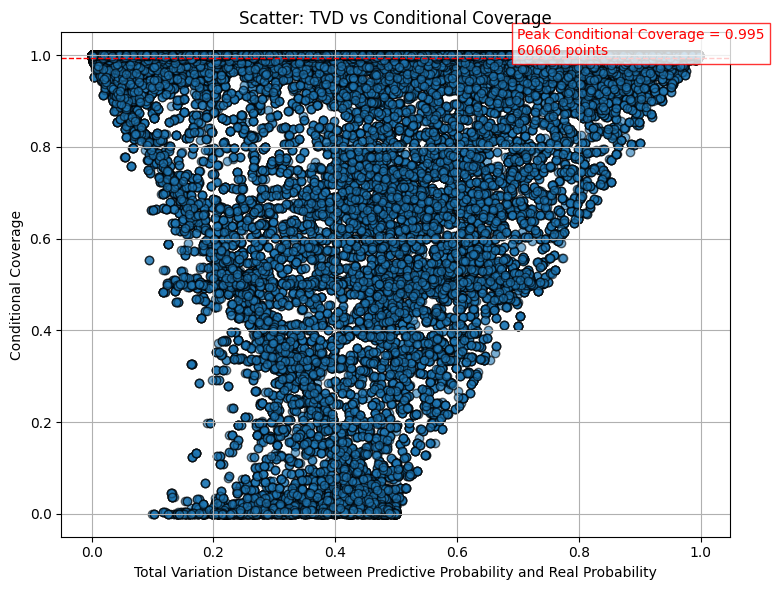

Peak Conditional Coverage = 0.995, with 60606 samples

=== Count Regions Summary ===
44144 (35.5%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35285 (28.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
17877 (14.4%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.98075', '0.00609', '0.00554']
  Real Probability Set      : ['0.97253', '0.02062', '0.00132']
Sample 2:
  Predictive Probability Set: ['0.99818', '0.00136', '0.00028']
  Real Probability Set      : ['0.96483', '0.03044', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.50061', '0.49570', '0.00109', '0.00096', '0.00062', '0.00015', '0.00009', '0.00006', '0.00004', '0.00004', '0.00004', '0.00003', '0.00003']
  Real Probability Set      : ['0.49355', '0.48287', '0.00016', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']

--- Region 2

In [5]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05)